# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB

# Quick overview of the dataset :

* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.



**Problem Statement** 
Given a new datapoint we have to predict the Activity

In [0]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features1 = list()
with open('features.txt') as f:
    features1 = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features1)))
features1

## Obtain the  train data 

In [0]:
X_train = pd.read_csv('X_train.txt',delim_whitespace=True, header=None)
X_train.columns=['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-std()-X',
 'tGravityAcc-std()-Y',
 'tGravityAcc-std()-Z',
 'tGravityAcc-mad()-X',
 'tGravityAcc-mad()-Y',
 'tGravityAcc-mad()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-iqr()-X',
 'tGravityAcc-iqr()-Y',
 'tGravityAcc-iqr()-Z',
 'tGravityAcc-entropy()-X',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-arCoeff()-X,2',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Y,2',
 'tGravityAcc-arCoeff()-Y,3',
 'tGravityAcc-arCoeff()-Y,4',
 'tGravityAcc-arCoeff()-Z,1',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-arCoeff()-Z,4',
 'tGravityAcc-correlation()-X,Y',
 'tGravityAcc-correlation()-X,Z',
 'tGravityAcc-correlation()-Y,Z',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-mean()-Y',
 'tBodyAccJerk-mean()-Z',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-std()-Y',
 'tBodyAccJerk-std()-Z',
 'tBodyAccJerk-mad()-X',
 'tBodyAccJerk-mad()-Y',
 'tBodyAccJerk-mad()-Z',
 'tBodyAccJerk-max()-X',
 'tBodyAccJerk-max()-Y',
 'tBodyAccJerk-max()-Z',
 'tBodyAccJerk-min()-X',
 'tBodyAccJerk-min()-Y',
 'tBodyAccJerk-min()-Z',
 'tBodyAccJerk-sma()',
 'tBodyAccJerk-energy()-X',
 'tBodyAccJerk-energy()-Y',
 'tBodyAccJerk-energy()-Z',
 'tBodyAccJerk-iqr()-X',
 'tBodyAccJerk-iqr()-Y',
 'tBodyAccJerk-iqr()-Z',
 'tBodyAccJerk-entropy()-X',
 'tBodyAccJerk-entropy()-Y',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-X,1',
 'tBodyAccJerk-arCoeff()-X,2',
 'tBodyAccJerk-arCoeff()-X,3',
 'tBodyAccJerk-arCoeff()-X,4',
 'tBodyAccJerk-arCoeff()-Y,1',
 'tBodyAccJerk-arCoeff()-Y,2',
 'tBodyAccJerk-arCoeff()-Y,3',
 'tBodyAccJerk-arCoeff()-Y,4',
 'tBodyAccJerk-arCoeff()-Z,1',
 'tBodyAccJerk-arCoeff()-Z,2',
 'tBodyAccJerk-arCoeff()-Z,3',
 'tBodyAccJerk-arCoeff()-Z,4',
 'tBodyAccJerk-correlation()-X,Y',
 'tBodyAccJerk-correlation()-X,Z',
 'tBodyAccJerk-correlation()-Y,Z',
 'tBodyGyro-mean()-X',
 'tBodyGyro-mean()-Y',
 'tBodyGyro-mean()-Z',
 'tBodyGyro-std()-X',
 'tBodyGyro-std()-Y',
 'tBodyGyro-std()-Z',
 'tBodyGyro-mad()-X',
 'tBodyGyro-mad()-Y',
 'tBodyGyro-mad()-Z',
 'tBodyGyro-max()-X',
 'tBodyGyro-max()-Y',
 'tBodyGyro-max()-Z',
 'tBodyGyro-min()-X',
 'tBodyGyro-min()-Y',
 'tBodyGyro-min()-Z',
 'tBodyGyro-sma()',
 'tBodyGyro-energy()-X',
 'tBodyGyro-energy()-Y',
 'tBodyGyro-energy()-Z',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-iqr()-Y',
 'tBodyGyro-iqr()-Z',
 'tBodyGyro-entropy()-X',
 'tBodyGyro-entropy()-Y',
 'tBodyGyro-entropy()-Z',
 'tBodyGyro-arCoeff()-X,1',
 'tBodyGyro-arCoeff()-X,2',
 'tBodyGyro-arCoeff()-X,3',
 'tBodyGyro-arCoeff()-X,4',
 'tBodyGyro-arCoeff()-Y,1',
 'tBodyGyro-arCoeff()-Y,2',
 'tBodyGyro-arCoeff()-Y,3',
 'tBodyGyro-arCoeff()-Y,4',
 'tBodyGyro-arCoeff()-Z,1',
 'tBodyGyro-arCoeff()-Z,2',
 'tBodyGyro-arCoeff()-Z,3',
 'tBodyGyro-arCoeff()-Z,4',
 'tBodyGyro-correlation()-X,Y',
 'tBodyGyro-correlation()-X,Z',
 'tBodyGyro-correlation()-Y,Z',
 'tBodyGyroJerk-mean()-X',
 'tBodyGyroJerk-mean()-Y',
 'tBodyGyroJerk-mean()-Z',
 'tBodyGyroJerk-std()-X',
 'tBodyGyroJerk-std()-Y',
 'tBodyGyroJerk-std()-Z',
 'tBodyGyroJerk-mad()-X',
 'tBodyGyroJerk-mad()-Y',
 'tBodyGyroJerk-mad()-Z',
 'tBodyGyroJerk-max()-X',
 'tBodyGyroJerk-max()-Y',
 'tBodyGyroJerk-max()-Z',
 'tBodyGyroJerk-min()-X',
 'tBodyGyroJerk-min()-Y',
 'tBodyGyroJerk-min()-Z',
 'tBodyGyroJerk-sma()',
 'tBodyGyroJerk-energy()-X',
 'tBodyGyroJerk-energy()-Y',
 'tBodyGyroJerk-energy()-Z',
 'tBodyGyroJerk-iqr()-X',
 'tBodyGyroJerk-iqr()-Y',
 'tBodyGyroJerk-iqr()-Z',
 'tBodyGyroJerk-entropy()-X',
 'tBodyGyroJerk-entropy()-Y',
 'tBodyGyroJerk-entropy()-Z',
 'tBodyGyroJerk-arCoeff()-X,1',
 'tBodyGyroJerk-arCoeff()-X,2',
 'tBodyGyroJerk-arCoeff()-X,3',
 'tBodyGyroJerk-arCoeff()-X,4',
 'tBodyGyroJerk-arCoeff()-Y,1',
 'tBodyGyroJerk-arCoeff()-Y,2',
 'tBodyGyroJerk-arCoeff()-Y,3',
 'tBodyGyroJerk-arCoeff()-Y,4',
 'tBodyGyroJerk-arCoeff()-Z,1',
 'tBodyGyroJerk-arCoeff()-Z,2',
 'tBodyGyroJerk-arCoeff()-Z,3',
 'tBodyGyroJerk-arCoeff()-Z,4',
 'tBodyGyroJerk-correlation()-X,Y',
 'tBodyGyroJerk-correlation()-X,Z',
 'tBodyGyroJerk-correlation()-Y,Z',
 'tBodyAccMag-mean()',
 'tBodyAccMag-std()',
 'tBodyAccMag-mad()',
 'tBodyAccMag-max()',
 'tBodyAccMag-min()',
 'tBodyAccMag-sma()',
 'tBodyAccMag-energy()',
 'tBodyAccMag-iqr()',
 'tBodyAccMag-entropy()',
 'tBodyAccMag-arCoeff()1',
 'tBodyAccMag-arCoeff()2',
 'tBodyAccMag-arCoeff()3',
 'tBodyAccMag-arCoeff()4',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-std()',
 'tBodyAccJerkMag-mad()',
 'tBodyAccJerkMag-max()',
 'tBodyAccJerkMag-min()',
 'tBodyAccJerkMag-sma()',
 'tBodyAccJerkMag-energy()',
 'tBodyAccJerkMag-iqr()',
 'tBodyAccJerkMag-entropy()',
 'tBodyAccJerkMag-arCoeff()1',
 'tBodyAccJerkMag-arCoeff()2',
 'tBodyAccJerkMag-arCoeff()3',
 'tBodyAccJerkMag-arCoeff()4',
 'tBodyGyroMag-mean()',
 'tBodyGyroMag-std()',
 'tBodyGyroMag-mad()',
 'tBodyGyroMag-max()',
 'tBodyGyroMag-min()',
 'tBodyGyroMag-sma()',
 'tBodyGyroMag-energy()',
 'tBodyGyroMag-iqr()',
 'tBodyGyroMag-entropy()',
 'tBodyGyroMag-arCoeff()1',
 'tBodyGyroMag-arCoeff()2',
 'tBodyGyroMag-arCoeff()3',
 'tBodyGyroMag-arCoeff()4',
 'tBodyGyroJerkMag-mean()',
 'tBodyGyroJerkMag-std()',
 'tBodyGyroJerkMag-mad()',
 'tBodyGyroJerkMag-max()',
 'tBodyGyroJerkMag-min()',
 'tBodyGyroJerkMag-sma()',
 'tBodyGyroJerkMag-energy()',
 'tBodyGyroJerkMag-iqr()',
 'tBodyGyroJerkMag-entropy()',
 'tBodyGyroJerkMag-arCoeff()1',
 'tBodyGyroJerkMag-arCoeff()2',
 'tBodyGyroJerkMag-arCoeff()3',
 'tBodyGyroJerkMag-arCoeff()4',
 'fBodyAcc-mean()-X',
 'fBodyAcc-mean()-Y',
 'fBodyAcc-mean()-Z',
 'fBodyAcc-std()-X',
 'fBodyAcc-std()-Y',
 'fBodyAcc-std()-Z',
 'fBodyAcc-mad()-X',
 'fBodyAcc-mad()-Y',
 'fBodyAcc-mad()-Z',
 'fBodyAcc-max()-X',
 'fBodyAcc-max()-Y',
 'fBodyAcc-max()-Z',
 'fBodyAcc-min()-X',
 'fBodyAcc-min()-Y',
 'fBodyAcc-min()-Z',
 'fBodyAcc-sma()',
 'fBodyAcc-energy()-X',
 'fBodyAcc-energy()-Y',
 'fBodyAcc-energy()-Z',
 'fBodyAcc-iqr()-X',
 'fBodyAcc-iqr()-Y',
 'fBodyAcc-iqr()-Z',
 'fBodyAcc-entropy()-X',
 'fBodyAcc-entropy()-Y',
 'fBodyAcc-entropy()-Z',
 'fBodyAcc-maxInds-X',
 'fBodyAcc-maxInds-Y',
 'fBodyAcc-maxInds-Z',
 'fBodyAcc-meanFreq()-X',
 'fBodyAcc-meanFreq()-Y',
 'fBodyAcc-meanFreq()-Z',
 'fBodyAcc-skewness()-X',
 'fBodyAcc-kurtosis()-X',
 'fBodyAcc-skewness()-Y',
 'fBodyAcc-kurtosis()-Y',
 'fBodyAcc-skewness()-Z',
 'fBodyAcc-kurtosis()-Z',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAccJerk-mean()-X',
 'fBodyAccJerk-mean()-Y',
 'fBodyAccJerk-mean()-Z',
 'fBodyAccJerk-std()-X',
 'fBodyAccJerk-std()-Y',
 'fBodyAccJerk-std()-Z',
 'fBodyAccJerk-mad()-X',
 'fBodyAccJerk-mad()-Y',
 'fBodyAccJerk-mad()-Z',
 'fBodyAccJerk-max()-X',
 'fBodyAccJerk-max()-Y',
 'fBodyAccJerk-max()-Z',
 'fBodyAccJerk-min()-X',
 'fBodyAccJerk-min()-Y',
 'fBodyAccJerk-min()-Z',
 'fBodyAccJerk-sma()',
 'fBodyAccJerk-energy()-X',
 'fBodyAccJerk-energy()-Y',
 'fBodyAccJerk-energy()-Z',
 'fBodyAccJerk-iqr()-X',
 'fBodyAccJerk-iqr()-Y',
 'fBodyAccJerk-iqr()-Z',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-entropy()-Y',
 'fBodyAccJerk-entropy()-Z',
 'fBodyAccJerk-maxInds-X',
 'fBodyAccJerk-maxInds-Y',
 'fBodyAccJerk-maxInds-Z',
 'fBodyAccJerk-meanFreq()-X',
 'fBodyAccJerk-meanFreq()-Y',
 'fBodyAccJerk-meanFreq()-Z',
 'fBodyAccJerk-skewness()-X',
 'fBodyAccJerk-kurtosis()-X',
 'fBodyAccJerk-skewness()-Y',
 'fBodyAccJerk-kurtosis()-Y',
 'fBodyAccJerk-skewness()-Z',
 'fBodyAccJerk-kurtosis()-Z',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyGyro-mean()-X',
 'fBodyGyro-mean()-Y',
 'fBodyGyro-mean()-Z',
 'fBodyGyro-std()-X',
 'fBodyGyro-std()-Y',
 'fBodyGyro-std()-Z',
 'fBodyGyro-mad()-X',
 'fBodyGyro-mad()-Y',
 'fBodyGyro-mad()-Z',
 'fBodyGyro-max()-X',
 'fBodyGyro-max()-Y',
 'fBodyGyro-max()-Z',
 'fBodyGyro-min()-X',
 'fBodyGyro-min()-Y',
 'fBodyGyro-min()-Z',
 'fBodyGyro-sma()',
 'fBodyGyro-energy()-X',
 'fBodyGyro-energy()-Y',
 'fBodyGyro-energy()-Z',
 'fBodyGyro-iqr()-X',
 'fBodyGyro-iqr()-Y',
 'fBodyGyro-iqr()-Z',
 'fBodyGyro-entropy()-X',
 'fBodyGyro-entropy()-Y',
 'fBodyGyro-entropy()-Z',
 'fBodyGyro-maxInds-X',
 'fBodyGyro-maxInds-Y',
 'fBodyGyro-maxInds-Z',
 'fBodyGyro-meanFreq()-X',
 'fBodyGyro-meanFreq()-Y',
 'fBodyGyro-meanFreq()-Z',
 'fBodyGyro-skewness()-X',
 'fBodyGyro-kurtosis()-X',
 'fBodyGyro-skewness()-Y',
 'fBodyGyro-kurtosis()-Y',
 'fBodyGyro-skewness()-Z',
 'fBodyGyro-kurtosis()-Z',
 'fBodyGyro-bandsEnergy()-1,8',
 'fBodyGyro-bandsEnergy()-9,16',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-25,32',
 'fBodyGyro-bandsEnergy()-33,40',
 'fBodyGyro-bandsEnergy()-41,48',
 'fBodyGyro-bandsEnergy()-49,56',
 'fBodyGyro-bandsEnergy()-57,64',
 'fBodyGyro-bandsEnergy()-1,16',
 'fBodyGyro-bandsEnergy()-17,32',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,64',
 'fBodyGyro-bandsEnergy()-1,24',
 'fBodyGyro-bandsEnergy()-25,48',
 'fBodyGyro-bandsEnergy()-1,8',
 'fBodyGyro-bandsEnergy()-9,16',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-25,32',
 'fBodyGyro-bandsEnergy()-33,40',
 'fBodyGyro-bandsEnergy()-41,48',
 'fBodyGyro-bandsEnergy()-49,56',
 'fBodyGyro-bandsEnergy()-57,64',
 'fBodyGyro-bandsEnergy()-1,16',
 'fBodyGyro-bandsEnergy()-17,32',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,64',
 'fBodyGyro-bandsEnergy()-1,24',
 'fBodyGyro-bandsEnergy()-25,48',
 'fBodyGyro-bandsEnergy()-1,8',
 'fBodyGyro-bandsEnergy()-9,16',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-25,32',
 'fBodyGyro-bandsEnergy()-33,40',
 'fBodyGyro-bandsEnergy()-41,48',
 'fBodyGyro-bandsEnergy()-49,56',
 'fBodyGyro-bandsEnergy()-57,64',
 'fBodyGyro-bandsEnergy()-1,16',
 'fBodyGyro-bandsEnergy()-17,32',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,64',
 'fBodyGyro-bandsEnergy()-1,24',
 'fBodyGyro-bandsEnergy()-25,48',
 'fBodyAccMag-mean()',
 'fBodyAccMag-std()',
 'fBodyAccMag-mad()',
 'fBodyAccMag-max()',
 'fBodyAccMag-min()',
 'fBodyAccMag-sma()',
 'fBodyAccMag-energy()',
 'fBodyAccMag-iqr()',
 'fBodyAccMag-entropy()',
 'fBodyAccMag-maxInds',
 'fBodyAccMag-meanFreq()',
 'fBodyAccMag-skewness()',
 'fBodyAccMag-kurtosis()',
 'fBodyBodyAccJerkMag-mean()',
 'fBodyBodyAccJerkMag-std()',
 'fBodyBodyAccJerkMag-mad()',
 'fBodyBodyAccJerkMag-max()',
 'fBodyBodyAccJerkMag-min()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyAccJerkMag-energy()',
 'fBodyBodyAccJerkMag-iqr()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyAccJerkMag-maxInds',
 'fBodyBodyAccJerkMag-meanFreq()',
 'fBodyBodyAccJerkMag-skewness()',
 'fBodyBodyAccJerkMag-kurtosis()',
 'fBodyBodyGyroMag-mean()',
 'fBodyBodyGyroMag-std()',
 'fBodyBodyGyroMag-mad()',
 'fBodyBodyGyroMag-max()',
 'fBodyBodyGyroMag-min()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroMag-energy()',
 'fBodyBodyGyroMag-iqr()',
 'fBodyBodyGyroMag-entropy()',
 'fBodyBodyGyroMag-maxInds',
 'fBodyBodyGyroMag-meanFreq()',
 'fBodyBodyGyroMag-skewness()',
 'fBodyBodyGyroMag-kurtosis()',
 'fBodyBodyGyroJerkMag-mean()',
 'fBodyBodyGyroJerkMag-std()',
 'fBodyBodyGyroJerkMag-mad()',
 'fBodyBodyGyroJerkMag-max()',
 'fBodyBodyGyroJerkMag-min()',
 'fBodyBodyGyroJerkMag-sma()',
 'fBodyBodyGyroJerkMag-energy()',
 'fBodyBodyGyroJerkMag-iqr()',
 'fBodyBodyGyroJerkMag-entropy()',
 'fBodyBodyGyroJerkMag-maxInds',
 'fBodyBodyGyroJerkMag-meanFreq()',
 'fBodyBodyGyroJerkMag-skewness()',
 'fBodyBodyGyroJerkMag-kurtosis()',
 'angle(tBodyAccMean,gravity)',
 'angle(tBodyAccJerkMean),gravityMean)',
 'angle(tBodyGyroMean,gravityMean)',
 'angle(tBodyGyroJerkMean,gravityMean)',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)']
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3293,0.276345,-0.018279,-0.111332,-0.997437,-0.99707,-0.985207,-0.997526,-0.996797,-0.985353,-0.942305,-0.577132,-0.815955,0.851831,0.694154,0.841116,-0.995809,-0.999986,-0.999985,-0.999684,-0.99667,-0.996639,-0.984718,-0.728912,-0.842606,-0.595835,0.163004,-0.06083,0.056257,0.090211,0.518671,-0.287911,0.230558,0.007787,0.347701,-0.19741,0.126726,-0.195783,-0.051099,0.119877,0.552717,...,-0.873016,0.386415,-0.786603,-0.935039,-0.999152,-0.998502,-0.998923,-0.99795,-0.997165,-0.999152,-0.999995,-0.99971,-1.0,-1.0,0.373538,-0.400705,-0.708964,-0.999727,-0.999417,-0.999297,-0.999606,-0.996943,-0.999727,-0.999999,-0.998572,-1.0,-1.0,0.519794,-0.800651,-0.943048,0.108999,-0.115131,0.012051,0.11833,-0.86418,0.039628,0.097938,17,4,SITTING


so i basically have 564 columns as my features and the shape of my train set is given by 

In [0]:
train.shape

(7352, 564)

similarly obtain the test data as we obtained the train data 

In [0]:
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None)
X_test.columns=['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-std()-X',
 'tGravityAcc-std()-Y',
 'tGravityAcc-std()-Z',
 'tGravityAcc-mad()-X',
 'tGravityAcc-mad()-Y',
 'tGravityAcc-mad()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-iqr()-X',
 'tGravityAcc-iqr()-Y',
 'tGravityAcc-iqr()-Z',
 'tGravityAcc-entropy()-X',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-arCoeff()-X,2',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Y,2',
 'tGravityAcc-arCoeff()-Y,3',
 'tGravityAcc-arCoeff()-Y,4',
 'tGravityAcc-arCoeff()-Z,1',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-arCoeff()-Z,4',
 'tGravityAcc-correlation()-X,Y',
 'tGravityAcc-correlation()-X,Z',
 'tGravityAcc-correlation()-Y,Z',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-mean()-Y',
 'tBodyAccJerk-mean()-Z',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-std()-Y',
 'tBodyAccJerk-std()-Z',
 'tBodyAccJerk-mad()-X',
 'tBodyAccJerk-mad()-Y',
 'tBodyAccJerk-mad()-Z',
 'tBodyAccJerk-max()-X',
 'tBodyAccJerk-max()-Y',
 'tBodyAccJerk-max()-Z',
 'tBodyAccJerk-min()-X',
 'tBodyAccJerk-min()-Y',
 'tBodyAccJerk-min()-Z',
 'tBodyAccJerk-sma()',
 'tBodyAccJerk-energy()-X',
 'tBodyAccJerk-energy()-Y',
 'tBodyAccJerk-energy()-Z',
 'tBodyAccJerk-iqr()-X',
 'tBodyAccJerk-iqr()-Y',
 'tBodyAccJerk-iqr()-Z',
 'tBodyAccJerk-entropy()-X',
 'tBodyAccJerk-entropy()-Y',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-X,1',
 'tBodyAccJerk-arCoeff()-X,2',
 'tBodyAccJerk-arCoeff()-X,3',
 'tBodyAccJerk-arCoeff()-X,4',
 'tBodyAccJerk-arCoeff()-Y,1',
 'tBodyAccJerk-arCoeff()-Y,2',
 'tBodyAccJerk-arCoeff()-Y,3',
 'tBodyAccJerk-arCoeff()-Y,4',
 'tBodyAccJerk-arCoeff()-Z,1',
 'tBodyAccJerk-arCoeff()-Z,2',
 'tBodyAccJerk-arCoeff()-Z,3',
 'tBodyAccJerk-arCoeff()-Z,4',
 'tBodyAccJerk-correlation()-X,Y',
 'tBodyAccJerk-correlation()-X,Z',
 'tBodyAccJerk-correlation()-Y,Z',
 'tBodyGyro-mean()-X',
 'tBodyGyro-mean()-Y',
 'tBodyGyro-mean()-Z',
 'tBodyGyro-std()-X',
 'tBodyGyro-std()-Y',
 'tBodyGyro-std()-Z',
 'tBodyGyro-mad()-X',
 'tBodyGyro-mad()-Y',
 'tBodyGyro-mad()-Z',
 'tBodyGyro-max()-X',
 'tBodyGyro-max()-Y',
 'tBodyGyro-max()-Z',
 'tBodyGyro-min()-X',
 'tBodyGyro-min()-Y',
 'tBodyGyro-min()-Z',
 'tBodyGyro-sma()',
 'tBodyGyro-energy()-X',
 'tBodyGyro-energy()-Y',
 'tBodyGyro-energy()-Z',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-iqr()-Y',
 'tBodyGyro-iqr()-Z',
 'tBodyGyro-entropy()-X',
 'tBodyGyro-entropy()-Y',
 'tBodyGyro-entropy()-Z',
 'tBodyGyro-arCoeff()-X,1',
 'tBodyGyro-arCoeff()-X,2',
 'tBodyGyro-arCoeff()-X,3',
 'tBodyGyro-arCoeff()-X,4',
 'tBodyGyro-arCoeff()-Y,1',
 'tBodyGyro-arCoeff()-Y,2',
 'tBodyGyro-arCoeff()-Y,3',
 'tBodyGyro-arCoeff()-Y,4',
 'tBodyGyro-arCoeff()-Z,1',
 'tBodyGyro-arCoeff()-Z,2',
 'tBodyGyro-arCoeff()-Z,3',
 'tBodyGyro-arCoeff()-Z,4',
 'tBodyGyro-correlation()-X,Y',
 'tBodyGyro-correlation()-X,Z',
 'tBodyGyro-correlation()-Y,Z',
 'tBodyGyroJerk-mean()-X',
 'tBodyGyroJerk-mean()-Y',
 'tBodyGyroJerk-mean()-Z',
 'tBodyGyroJerk-std()-X',
 'tBodyGyroJerk-std()-Y',
 'tBodyGyroJerk-std()-Z',
 'tBodyGyroJerk-mad()-X',
 'tBodyGyroJerk-mad()-Y',
 'tBodyGyroJerk-mad()-Z',
 'tBodyGyroJerk-max()-X',
 'tBodyGyroJerk-max()-Y',
 'tBodyGyroJerk-max()-Z',
 'tBodyGyroJerk-min()-X',
 'tBodyGyroJerk-min()-Y',
 'tBodyGyroJerk-min()-Z',
 'tBodyGyroJerk-sma()',
 'tBodyGyroJerk-energy()-X',
 'tBodyGyroJerk-energy()-Y',
 'tBodyGyroJerk-energy()-Z',
 'tBodyGyroJerk-iqr()-X',
 'tBodyGyroJerk-iqr()-Y',
 'tBodyGyroJerk-iqr()-Z',
 'tBodyGyroJerk-entropy()-X',
 'tBodyGyroJerk-entropy()-Y',
 'tBodyGyroJerk-entropy()-Z',
 'tBodyGyroJerk-arCoeff()-X,1',
 'tBodyGyroJerk-arCoeff()-X,2',
 'tBodyGyroJerk-arCoeff()-X,3',
 'tBodyGyroJerk-arCoeff()-X,4',
 'tBodyGyroJerk-arCoeff()-Y,1',
 'tBodyGyroJerk-arCoeff()-Y,2',
 'tBodyGyroJerk-arCoeff()-Y,3',
 'tBodyGyroJerk-arCoeff()-Y,4',
 'tBodyGyroJerk-arCoeff()-Z,1',
 'tBodyGyroJerk-arCoeff()-Z,2',
 'tBodyGyroJerk-arCoeff()-Z,3',
 'tBodyGyroJerk-arCoeff()-Z,4',
 'tBodyGyroJerk-correlation()-X,Y',
 'tBodyGyroJerk-correlation()-X,Z',
 'tBodyGyroJerk-correlation()-Y,Z',
 'tBodyAccMag-mean()',
 'tBodyAccMag-std()',
 'tBodyAccMag-mad()',
 'tBodyAccMag-max()',
 'tBodyAccMag-min()',
 'tBodyAccMag-sma()',
 'tBodyAccMag-energy()',
 'tBodyAccMag-iqr()',
 'tBodyAccMag-entropy()',
 'tBodyAccMag-arCoeff()1',
 'tBodyAccMag-arCoeff()2',
 'tBodyAccMag-arCoeff()3',
 'tBodyAccMag-arCoeff()4',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-std()',
 'tBodyAccJerkMag-mad()',
 'tBodyAccJerkMag-max()',
 'tBodyAccJerkMag-min()',
 'tBodyAccJerkMag-sma()',
 'tBodyAccJerkMag-energy()',
 'tBodyAccJerkMag-iqr()',
 'tBodyAccJerkMag-entropy()',
 'tBodyAccJerkMag-arCoeff()1',
 'tBodyAccJerkMag-arCoeff()2',
 'tBodyAccJerkMag-arCoeff()3',
 'tBodyAccJerkMag-arCoeff()4',
 'tBodyGyroMag-mean()',
 'tBodyGyroMag-std()',
 'tBodyGyroMag-mad()',
 'tBodyGyroMag-max()',
 'tBodyGyroMag-min()',
 'tBodyGyroMag-sma()',
 'tBodyGyroMag-energy()',
 'tBodyGyroMag-iqr()',
 'tBodyGyroMag-entropy()',
 'tBodyGyroMag-arCoeff()1',
 'tBodyGyroMag-arCoeff()2',
 'tBodyGyroMag-arCoeff()3',
 'tBodyGyroMag-arCoeff()4',
 'tBodyGyroJerkMag-mean()',
 'tBodyGyroJerkMag-std()',
 'tBodyGyroJerkMag-mad()',
 'tBodyGyroJerkMag-max()',
 'tBodyGyroJerkMag-min()',
 'tBodyGyroJerkMag-sma()',
 'tBodyGyroJerkMag-energy()',
 'tBodyGyroJerkMag-iqr()',
 'tBodyGyroJerkMag-entropy()',
 'tBodyGyroJerkMag-arCoeff()1',
 'tBodyGyroJerkMag-arCoeff()2',
 'tBodyGyroJerkMag-arCoeff()3',
 'tBodyGyroJerkMag-arCoeff()4',
 'fBodyAcc-mean()-X',
 'fBodyAcc-mean()-Y',
 'fBodyAcc-mean()-Z',
 'fBodyAcc-std()-X',
 'fBodyAcc-std()-Y',
 'fBodyAcc-std()-Z',
 'fBodyAcc-mad()-X',
 'fBodyAcc-mad()-Y',
 'fBodyAcc-mad()-Z',
 'fBodyAcc-max()-X',
 'fBodyAcc-max()-Y',
 'fBodyAcc-max()-Z',
 'fBodyAcc-min()-X',
 'fBodyAcc-min()-Y',
 'fBodyAcc-min()-Z',
 'fBodyAcc-sma()',
 'fBodyAcc-energy()-X',
 'fBodyAcc-energy()-Y',
 'fBodyAcc-energy()-Z',
 'fBodyAcc-iqr()-X',
 'fBodyAcc-iqr()-Y',
 'fBodyAcc-iqr()-Z',
 'fBodyAcc-entropy()-X',
 'fBodyAcc-entropy()-Y',
 'fBodyAcc-entropy()-Z',
 'fBodyAcc-maxInds-X',
 'fBodyAcc-maxInds-Y',
 'fBodyAcc-maxInds-Z',
 'fBodyAcc-meanFreq()-X',
 'fBodyAcc-meanFreq()-Y',
 'fBodyAcc-meanFreq()-Z',
 'fBodyAcc-skewness()-X',
 'fBodyAcc-kurtosis()-X',
 'fBodyAcc-skewness()-Y',
 'fBodyAcc-kurtosis()-Y',
 'fBodyAcc-skewness()-Z',
 'fBodyAcc-kurtosis()-Z',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAccJerk-mean()-X',
 'fBodyAccJerk-mean()-Y',
 'fBodyAccJerk-mean()-Z',
 'fBodyAccJerk-std()-X',
 'fBodyAccJerk-std()-Y',
 'fBodyAccJerk-std()-Z',
 'fBodyAccJerk-mad()-X',
 'fBodyAccJerk-mad()-Y',
 'fBodyAccJerk-mad()-Z',
 'fBodyAccJerk-max()-X',
 'fBodyAccJerk-max()-Y',
 'fBodyAccJerk-max()-Z',
 'fBodyAccJerk-min()-X',
 'fBodyAccJerk-min()-Y',
 'fBodyAccJerk-min()-Z',
 'fBodyAccJerk-sma()',
 'fBodyAccJerk-energy()-X',
 'fBodyAccJerk-energy()-Y',
 'fBodyAccJerk-energy()-Z',
 'fBodyAccJerk-iqr()-X',
 'fBodyAccJerk-iqr()-Y',
 'fBodyAccJerk-iqr()-Z',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-entropy()-Y',
 'fBodyAccJerk-entropy()-Z',
 'fBodyAccJerk-maxInds-X',
 'fBodyAccJerk-maxInds-Y',
 'fBodyAccJerk-maxInds-Z',
 'fBodyAccJerk-meanFreq()-X',
 'fBodyAccJerk-meanFreq()-Y',
 'fBodyAccJerk-meanFreq()-Z',
 'fBodyAccJerk-skewness()-X',
 'fBodyAccJerk-kurtosis()-X',
 'fBodyAccJerk-skewness()-Y',
 'fBodyAccJerk-kurtosis()-Y',
 'fBodyAccJerk-skewness()-Z',
 'fBodyAccJerk-kurtosis()-Z',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyGyro-mean()-X',
 'fBodyGyro-mean()-Y',
 'fBodyGyro-mean()-Z',
 'fBodyGyro-std()-X',
 'fBodyGyro-std()-Y',
 'fBodyGyro-std()-Z',
 'fBodyGyro-mad()-X',
 'fBodyGyro-mad()-Y',
 'fBodyGyro-mad()-Z',
 'fBodyGyro-max()-X',
 'fBodyGyro-max()-Y',
 'fBodyGyro-max()-Z',
 'fBodyGyro-min()-X',
 'fBodyGyro-min()-Y',
 'fBodyGyro-min()-Z',
 'fBodyGyro-sma()',
 'fBodyGyro-energy()-X',
 'fBodyGyro-energy()-Y',
 'fBodyGyro-energy()-Z',
 'fBodyGyro-iqr()-X',
 'fBodyGyro-iqr()-Y',
 'fBodyGyro-iqr()-Z',
 'fBodyGyro-entropy()-X',
 'fBodyGyro-entropy()-Y',
 'fBodyGyro-entropy()-Z',
 'fBodyGyro-maxInds-X',
 'fBodyGyro-maxInds-Y',
 'fBodyGyro-maxInds-Z',
 'fBodyGyro-meanFreq()-X',
 'fBodyGyro-meanFreq()-Y',
 'fBodyGyro-meanFreq()-Z',
 'fBodyGyro-skewness()-X',
 'fBodyGyro-kurtosis()-X',
 'fBodyGyro-skewness()-Y',
 'fBodyGyro-kurtosis()-Y',
 'fBodyGyro-skewness()-Z',
 'fBodyGyro-kurtosis()-Z',
 'fBodyGyro-bandsEnergy()-1,8',
 'fBodyGyro-bandsEnergy()-9,16',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-25,32',
 'fBodyGyro-bandsEnergy()-33,40',
 'fBodyGyro-bandsEnergy()-41,48',
 'fBodyGyro-bandsEnergy()-49,56',
 'fBodyGyro-bandsEnergy()-57,64',
 'fBodyGyro-bandsEnergy()-1,16',
 'fBodyGyro-bandsEnergy()-17,32',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,64',
 'fBodyGyro-bandsEnergy()-1,24',
 'fBodyGyro-bandsEnergy()-25,48',
 'fBodyGyro-bandsEnergy()-1,8',
 'fBodyGyro-bandsEnergy()-9,16',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-25,32',
 'fBodyGyro-bandsEnergy()-33,40',
 'fBodyGyro-bandsEnergy()-41,48',
 'fBodyGyro-bandsEnergy()-49,56',
 'fBodyGyro-bandsEnergy()-57,64',
 'fBodyGyro-bandsEnergy()-1,16',
 'fBodyGyro-bandsEnergy()-17,32',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,64',
 'fBodyGyro-bandsEnergy()-1,24',
 'fBodyGyro-bandsEnergy()-25,48',
 'fBodyGyro-bandsEnergy()-1,8',
 'fBodyGyro-bandsEnergy()-9,16',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-25,32',
 'fBodyGyro-bandsEnergy()-33,40',
 'fBodyGyro-bandsEnergy()-41,48',
 'fBodyGyro-bandsEnergy()-49,56',
 'fBodyGyro-bandsEnergy()-57,64',
 'fBodyGyro-bandsEnergy()-1,16',
 'fBodyGyro-bandsEnergy()-17,32',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,64',
 'fBodyGyro-bandsEnergy()-1,24',
 'fBodyGyro-bandsEnergy()-25,48',
 'fBodyAccMag-mean()',
 'fBodyAccMag-std()',
 'fBodyAccMag-mad()',
 'fBodyAccMag-max()',
 'fBodyAccMag-min()',
 'fBodyAccMag-sma()',
 'fBodyAccMag-energy()',
 'fBodyAccMag-iqr()',
 'fBodyAccMag-entropy()',
 'fBodyAccMag-maxInds',
 'fBodyAccMag-meanFreq()',
 'fBodyAccMag-skewness()',
 'fBodyAccMag-kurtosis()',
 'fBodyBodyAccJerkMag-mean()',
 'fBodyBodyAccJerkMag-std()',
 'fBodyBodyAccJerkMag-mad()',
 'fBodyBodyAccJerkMag-max()',
 'fBodyBodyAccJerkMag-min()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyAccJerkMag-energy()',
 'fBodyBodyAccJerkMag-iqr()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyAccJerkMag-maxInds',
 'fBodyBodyAccJerkMag-meanFreq()',
 'fBodyBodyAccJerkMag-skewness()',
 'fBodyBodyAccJerkMag-kurtosis()',
 'fBodyBodyGyroMag-mean()',
 'fBodyBodyGyroMag-std()',
 'fBodyBodyGyroMag-mad()',
 'fBodyBodyGyroMag-max()',
 'fBodyBodyGyroMag-min()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroMag-energy()',
 'fBodyBodyGyroMag-iqr()',
 'fBodyBodyGyroMag-entropy()',
 'fBodyBodyGyroMag-maxInds',
 'fBodyBodyGyroMag-meanFreq()',
 'fBodyBodyGyroMag-skewness()',
 'fBodyBodyGyroMag-kurtosis()',
 'fBodyBodyGyroJerkMag-mean()',
 'fBodyBodyGyroJerkMag-std()',
 'fBodyBodyGyroJerkMag-mad()',
 'fBodyBodyGyroJerkMag-max()',
 'fBodyBodyGyroJerkMag-min()',
 'fBodyBodyGyroJerkMag-sma()',
 'fBodyBodyGyroJerkMag-energy()',
 'fBodyBodyGyroJerkMag-iqr()',
 'fBodyBodyGyroJerkMag-entropy()',
 'fBodyBodyGyroJerkMag-maxInds',
 'fBodyBodyGyroJerkMag-meanFreq()',
 'fBodyBodyGyroJerkMag-skewness()',
 'fBodyBodyGyroJerkMag-kurtosis()',
 'angle(tBodyAccMean,gravity)',
 'angle(tBodyAccJerkMean),gravityMean)',
 'angle(tBodyGyroMean,gravityMean)',
 'angle(tBodyGyroJerkMean,gravityMean)',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)']

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2628,0.274934,-0.01263,-0.122805,-0.992728,-0.973335,-0.951904,-0.993312,-0.974129,-0.951089,-0.939542,-0.558605,-0.808498,0.839741,0.685886,0.81339,-0.975196,-0.999941,-0.999726,-0.997994,-0.993465,-0.980936,-0.952854,-0.596687,-0.358257,-0.536232,0.086024,0.086264,0.12307,0.062364,0.202904,-0.150833,0.18028,-0.08882,-0.136184,0.122267,-0.04522,-0.178469,-0.291831,-0.088621,0.690891,...,-1.0,0.259338,-0.635799,-0.873074,-0.982416,-0.976411,-0.976699,-0.979562,-0.996543,-0.982416,-0.999642,-0.981223,-0.636798,-0.897436,-0.275522,-0.297845,-0.682616,-0.992086,-0.994285,-0.992772,-0.995621,-0.992817,-0.992086,-0.999953,-0.990772,-1.0,-0.904762,0.34082,-0.761796,-0.933601,0.020688,0.02386,0.015683,0.269247,-0.877811,0.012299,0.038708,24,4,SITTING


In [0]:
test.shape

(2947, 564)

# Data Cleaning

Always check for the duplicates.

## 1. Check for Duplicates

In [0]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


##2.Next check for Nan/null values

In [0]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3.Check for data imbalance

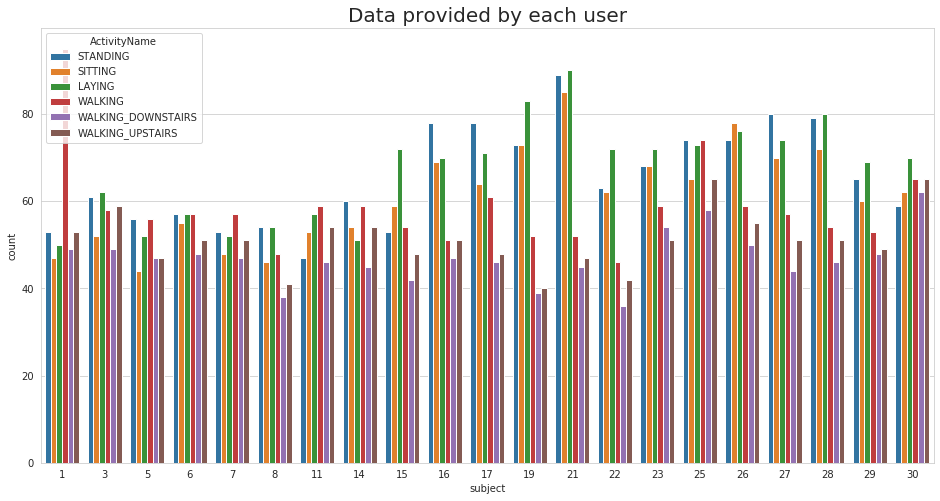

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


We have got almost same number of reading from all the subjects

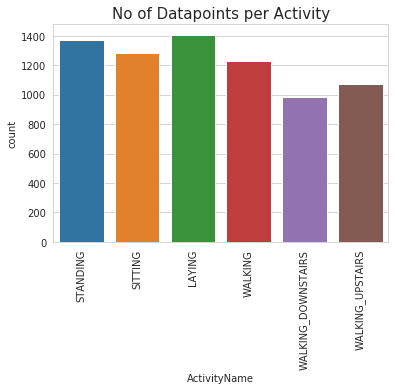

In [0]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(x=train.ActivityName)
plt.xticks(rotation=90)
plt.show()

**OBSERVATION**

Our data is well balanced (almost)

Now I'm going to change feature names as they sound geeky with hyphens and brackets

#4. Changing feature names


In [0]:
columns=train.columns
# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')
train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [0]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"




### 1. Featuring Engineering from Domain Knowledge 
​




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.



### 2. Stationary and Moving activities are completely different

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


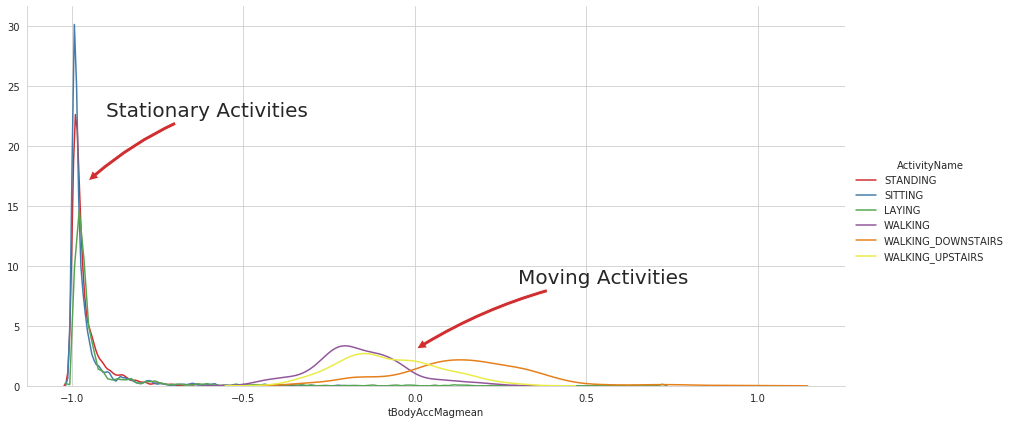

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.3, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

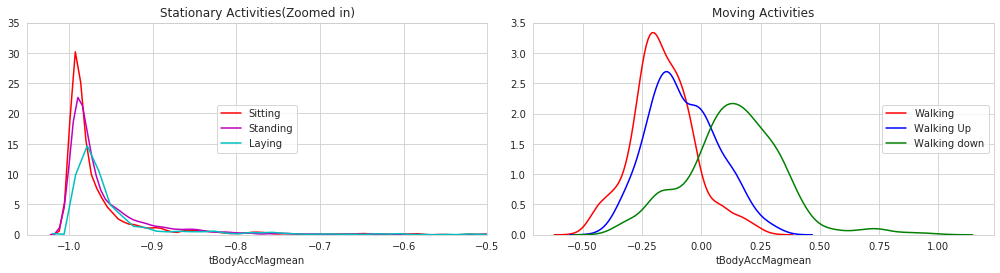

In [0]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.05, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

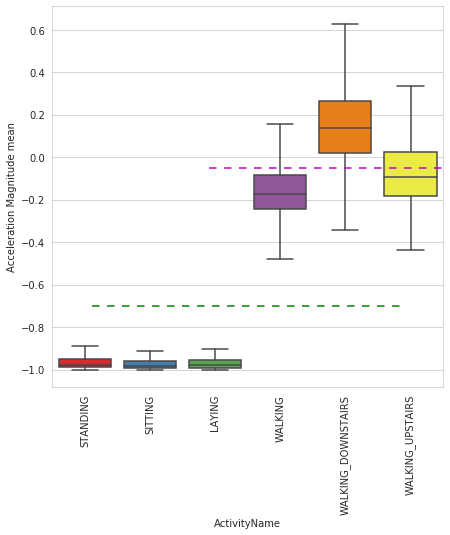

In [0]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()  

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

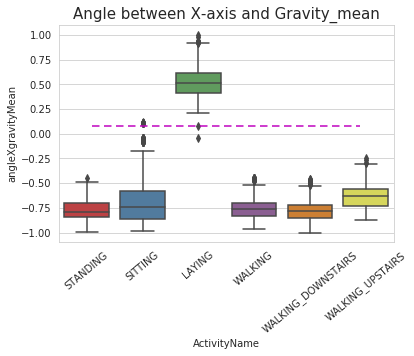

In [0]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

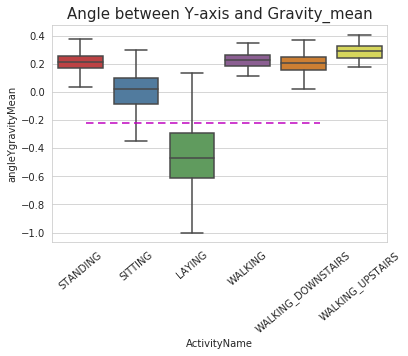

In [0]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

#DIMENSIONAL REDUCTION TECHNIQUE
Apply t-sne on the data

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# performs t-sne with different perplexity values and their repective plots..
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.265s...
[t-SNE] Computed neighbors for 7352 samples in 42.215s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.050s
[t-SNE] Iteration 50: error = 124.7430344, gradient norm = 0.0271650 (50 iterations in 4.727s)
[t-SNE] Iteration 100: error = 107.2943039, gradient norm = 0.0286992 (50 iterations in

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


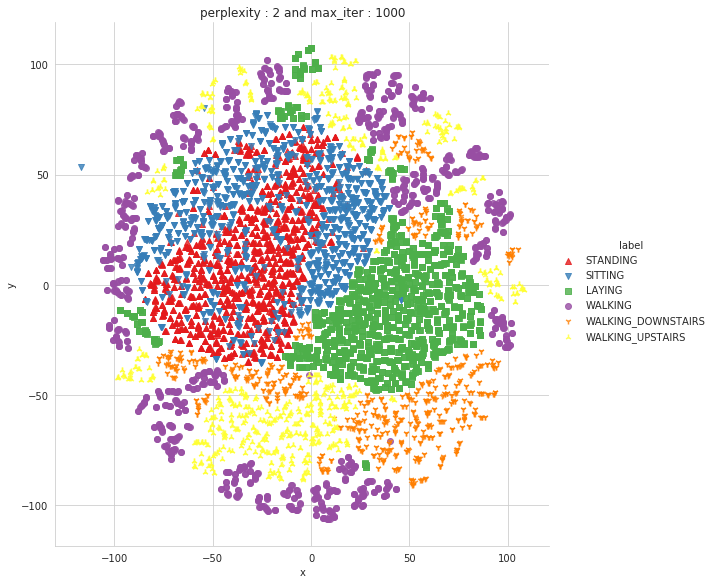

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.211s...
[t-SNE] Computed neighbors for 7352 samples in 42.875s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.068s
[t-SNE] Iteration 50: error = 113.7912369, gradient norm = 0.0245352 (50 iterations in 12.555s)
[t-SNE] Iteration 100: error = 97.3508530, gradient norm = 0.0157285 (50 iterati

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


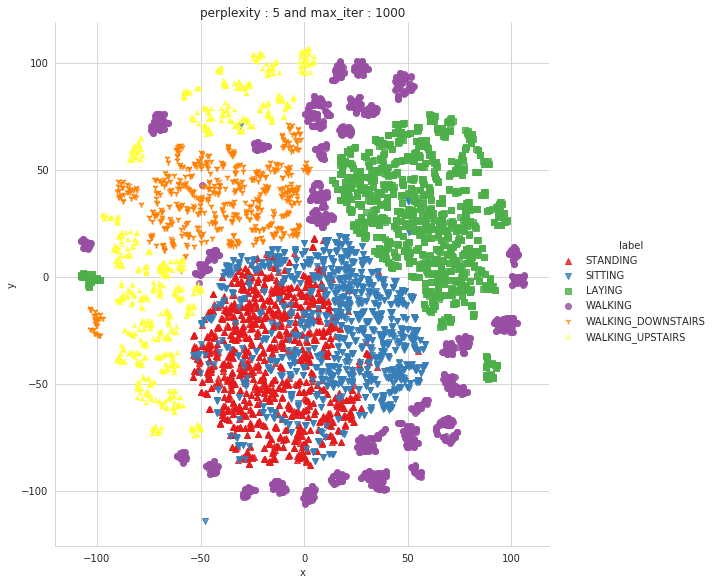

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.206s...
[t-SNE] Computed neighbors for 7352 samples in 43.285s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.126s
[t-SNE] Iteration 50: error = 105.2949524, gradient norm = 0.0240691 (50 iterations in 4.118s)
[t-SNE] Iteration 100: error = 90.0750732, gradient norm = 0.0090045 (50 iterati

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


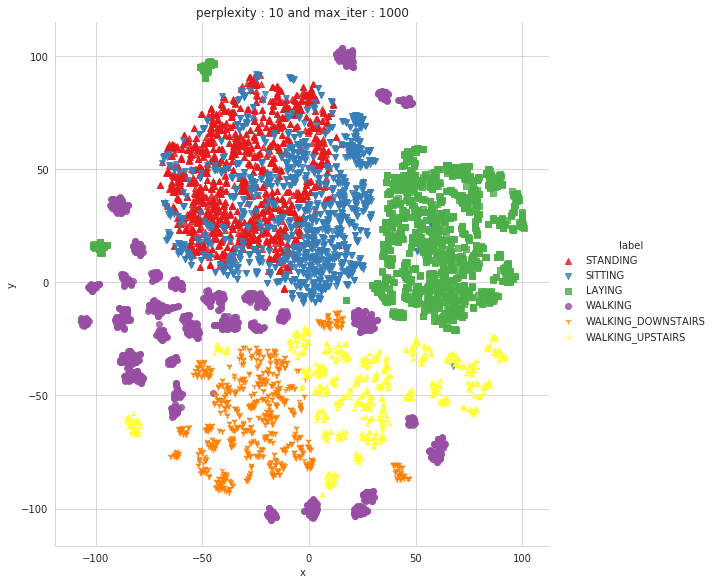

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.196s...
[t-SNE] Computed neighbors for 7352 samples in 44.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.244s
[t-SNE] Iteration 50: error = 97.4001160, gradient norm = 0.0219753 (50 iterations in 3.383s)
[t-SNE] Iteration 100: error = 84.3564377, gradient norm = 0.0062834 (50 iteratio

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


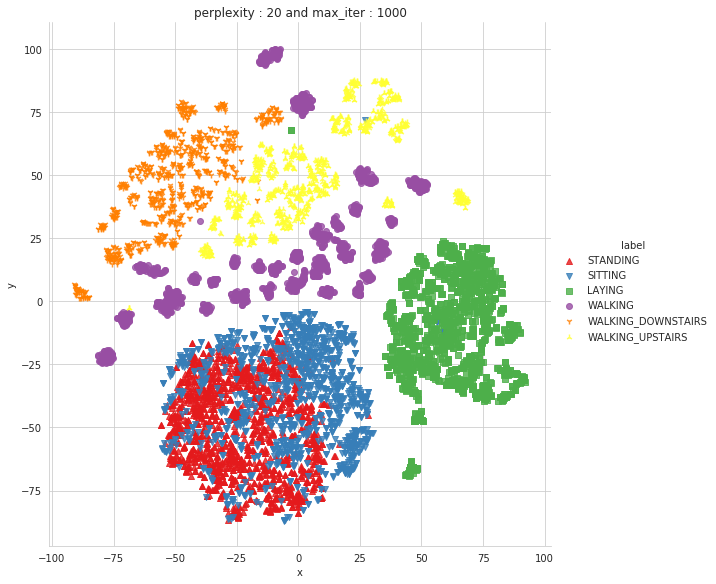

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.281s...
[t-SNE] Computed neighbors for 7352 samples in 46.861s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.599s
[t-SNE] Iteration 50: error = 87.1985703, gradient norm = 0.0073243 (50 iterations in 4.254s)
[t-SNE] Iteration 100: error = 75.6083221, gradient norm = 0.0041949 (50 iterati

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


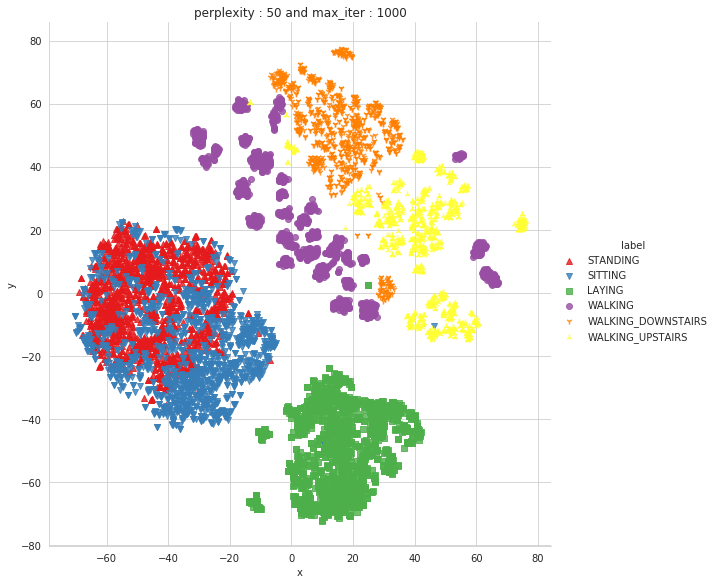

Done


In [0]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

**Observation**

1.By looking at the plots we understand that there is a lot of overlapping in sitting and standing 
   
2.Rest of the labels were classified decently by using tsne   



## HUMAN ACTIVITY RECOGNITION PREDICTION MODELS ANALYSIS 

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [0]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [0]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [0]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [0]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


## **Let's model with our data**

In [0]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [0]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


In [0]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    

Method to print the gridsearch Attributes

In [0]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    

In [0]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:04:49.213332


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.018616


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


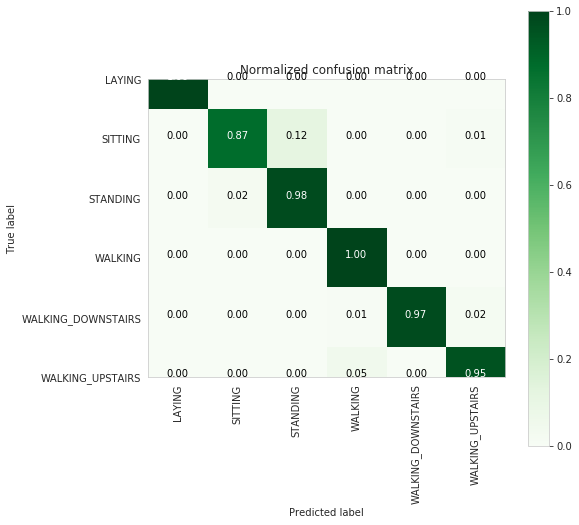

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [0]:

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=4, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


In [0]:
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



In [0]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:47.981990


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.026310


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


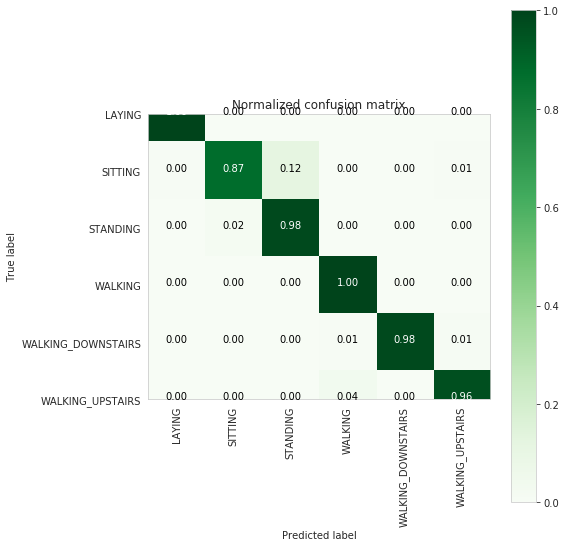

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
print_grid_search_attributes(lr_svc_grid_results['model'])

### Now I Performed by using RBF kernal SVM

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:07:00.424642


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.023215


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


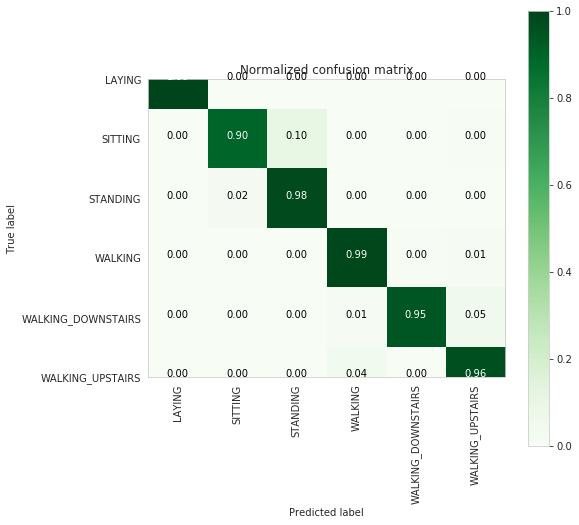

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [0]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees  with GridSearchCV

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:18.717279


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007613


---------------------
|      Accuracy      |
---------------------

    0.8642687478791992


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  12 347  61]
 [  0   0   0  68  34 369]]


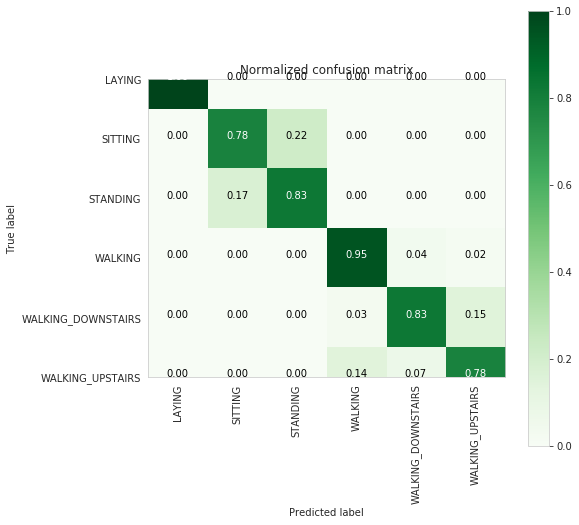

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.87      0.83      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       mi

In [0]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:11:50.031740


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.071045


---------------------
|      Accuracy      |
---------------------

    0.9124533423820834


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 422  69   0   0   0]
 [  0  51 481   0   0   0]
 [  0   0   0 485  10   1]
 [  0   0   0  33 341  46]
 [  0   0   0  42   6 423]]


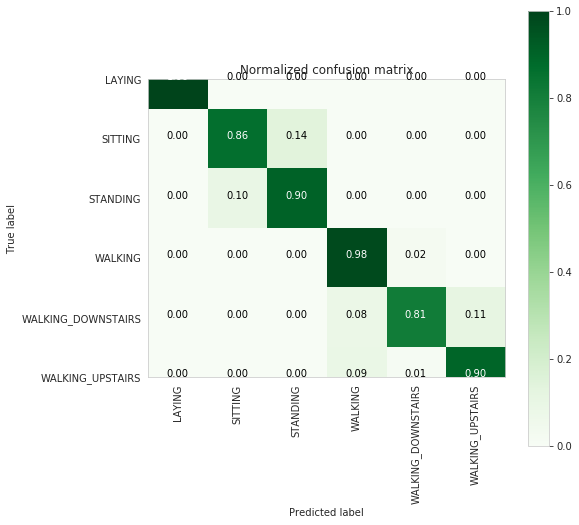

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.86      0.88       491
          STANDING       0.87      0.90      0.89       532
           WALKING       0.87      0.98      0.92       496
WALKING_DOWNSTAIRS       0.96      0.81      0.88       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
       

In [0]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6. Gradient Boosted Decision Trees With GridSearch

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 1:35:14.812367


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.071599


---------------------
|      Accuracy      |
---------------------

    0.9226331862911435


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 398  91   0   0   2]
 [  0  35 497   0   0   0]
 [  0   0   0 481   7   8]
 [  0   0   0   8 371  41]
 [  0   1   0  29   6 435]]


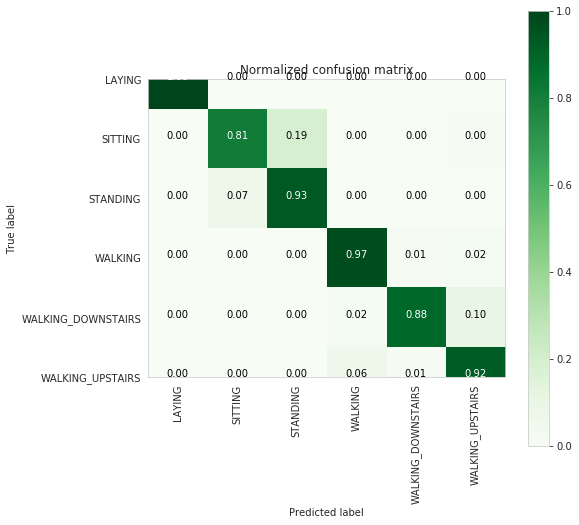

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.81      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.88      0.92       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           mi

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

# 7. Comparing all models


In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))

#Conclusion :

In the real world, domain-knowledge, EDA and feature-engineering matter most.